# importing modules  basic info about data removing unwanted columns and filling nun values

In [282]:
#Installing required Moduls
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [283]:
#removing non required columns(Loan_ID)
A = pd.read_csv("C:/Users/Pranav Afre/Downloads/PYTHON/training_set.csv")
A=A.drop(labels=["Loan_ID"],axis=1)
A.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [284]:
#Data has missing values 
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [285]:
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# missing value treatment and cat con suppressing

In [286]:
A.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [287]:
#the data has missing values we will treat it by using replacer function we will fill the values by mean in case 
#if the missing value is continuous or with mode if the value is catagorical

def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [288]:
replacer(A)

# EDA 

C:\Users\Pranav Afre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranav Afre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranav Afre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pran

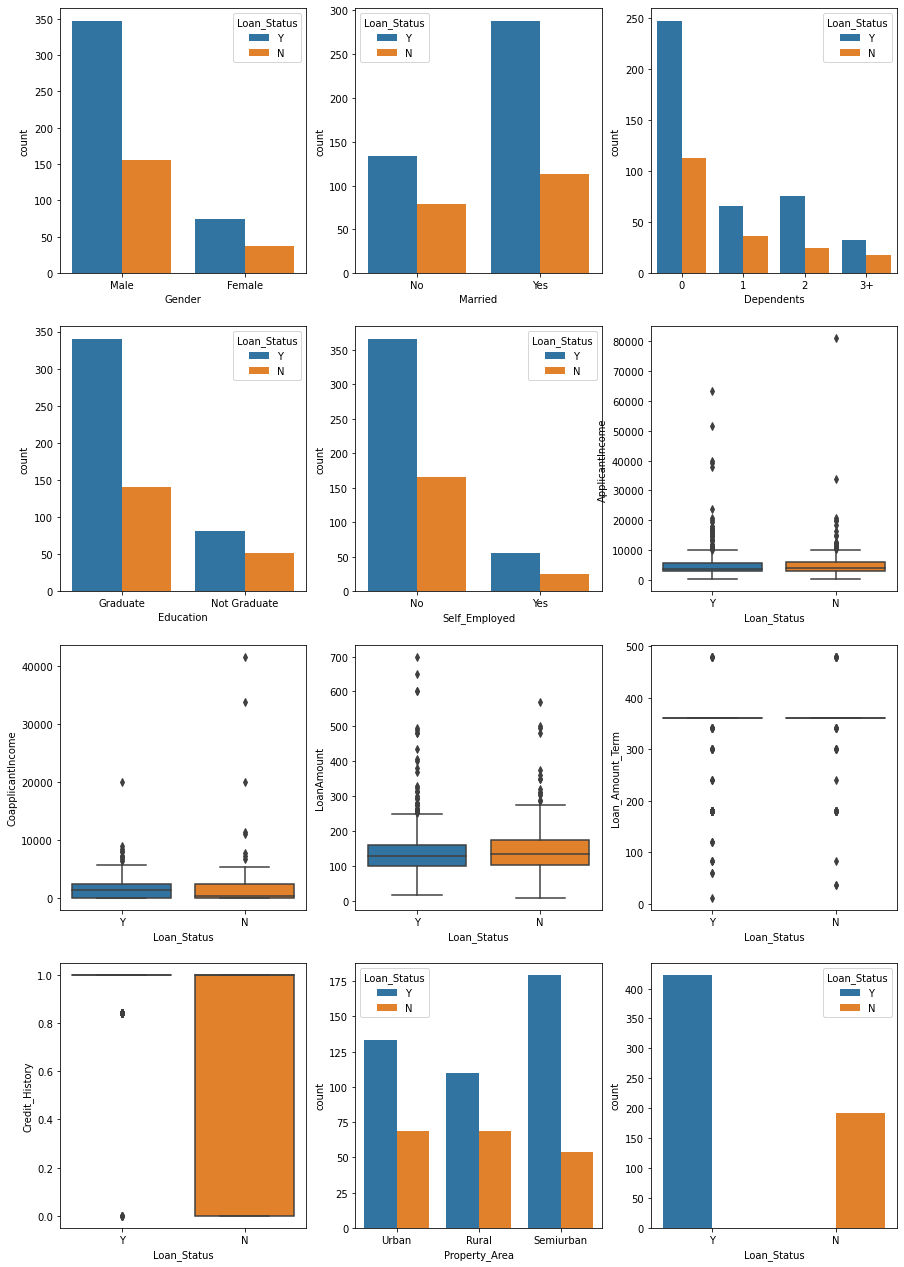

In [289]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,40))
m = 1
for i in A.columns:
    plt.subplot(7,3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i],hue=A.Loan_Status)
    else:
        sb.boxplot(A.Loan_Status,A[i])
    m = m + 1

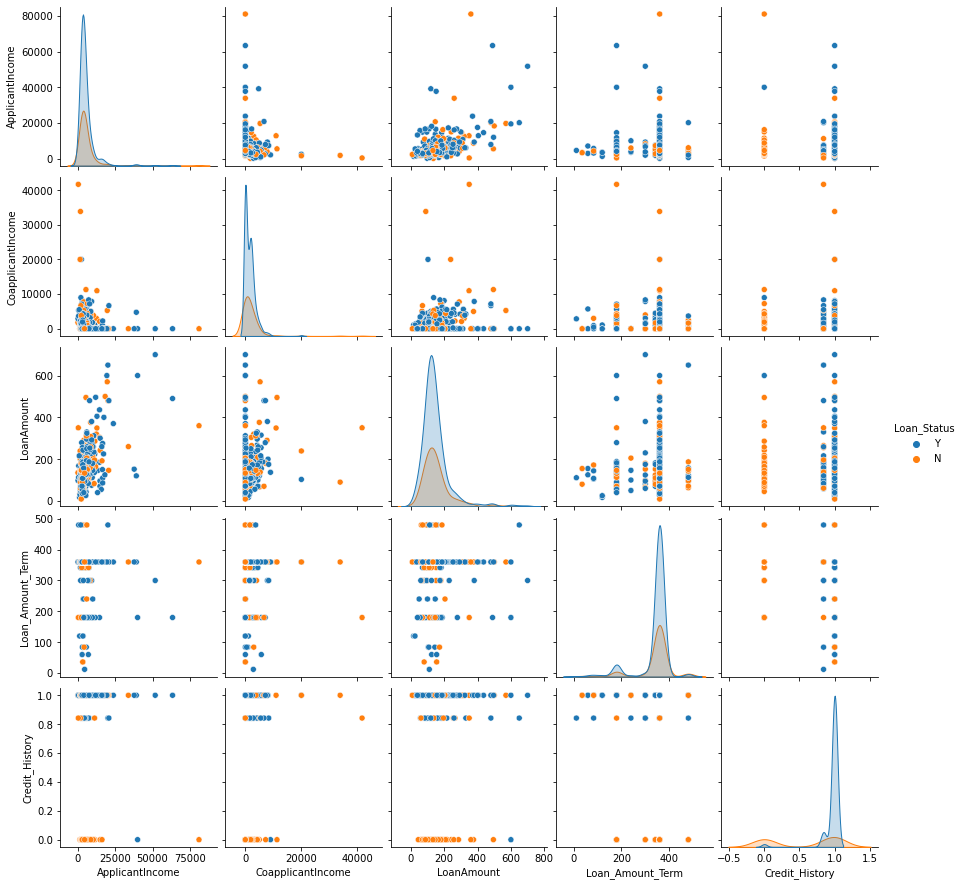

In [290]:
sb.pairplot(A,hue="Loan_Status")

# Building Model

# Check eligibility of the Customer given the inputs described above.

In [291]:
#1. Check eligibility of the Customer given the inputs.
### we will be using logistic regression for this problem statement as its giving 
### high accuracy than other classification alogrithms 

Y = A[["Loan_Status"]]
X = A[["Gender","Married","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]]

#catagorical and continuos variable suppression
cat=[]
con=[]
for i in X.columns:
        if X[i].dtypes=="object":
            cat.append(i)
        else:
            con.append(i)
X = X[con].join(pd.get_dummies(X[cat]))

In [292]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=22)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
print ("Testing error", accuracy_score(ytest,pred))
print ("Training error",accuracy_score(ytrain,pred_tr))

Testing error 0.8292682926829268
Training error 0.8105906313645621


C:\Users\Pranav Afre\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# 2.)Identify customer segments from given data and categorize customer into one of the segments.

In [293]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(X)
X["Cluster_no"] = model.labels_

C:\Users\Pranav Afre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

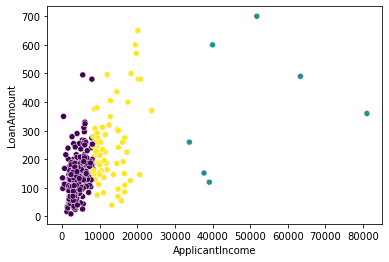

In [294]:
import seaborn as sb
sb.scatterplot(X.ApplicantIncome,X.LoanAmount,c=model.labels_)

In [295]:
#Since there is corrilation between LoanAmount and ApplicantIncome
# We may catagories the customer's into 3 segments according to the applicant income 
#1. low capital size upto 300: The applicants who have sallery till 9k can be eligible to get low cap size loan
#2. Mid Cap Siz 331-550: The applicants who have sallery from 9k above till 30k can be eligible to get Mid cap size loan
#3. High Cap Siz 551 + : The applicants who have sallery from above 30k can be eligible to get high cap size loan

# 3.)If customer is not eligible for the input required amount and duration:
#a.)what can be amount for the given duration.

In [445]:
X=A[["Loan_Amount_Term","ApplicantIncome"]]
Y=A[["LoanAmount"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)


In [446]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=20,max_depth=4)
model = dt.fit(xtrain,ytrain)
pred = model.predict(xtest)
W=xtest.join(ytest)
W['predicted_LoanAmount']=pred
W

,Loan_Amount_Term,ApplicantIncome,LoanAmount,predicted_LoanAmount
285,360.0,3158.0,89.0,113.634264
323,360.0,3166.0,132.0,113.634264
482,360.0,2083.0,128.0,113.634264
173,360.0,5708.0,187.0,169.585586
518,360.0,4683.0,185.0,136.120178
...,...,...,...,...
554,180.0,3593.0,132.0,113.634264
6,360.0,2333.0,95.0,113.634264
242,60.0,2965.0,155.0,113.634264
192,360.0,6033.0,160.0,169.585586


In [447]:
##We may consider 2 basic inputes from from the applicant
##The predicted loan amount defines the approxe eligible loan amount on the basis of 2 basic inputes from from the applicant 
##for example if the loan term is 360.0 appli incom :3158.0 then he will be eligible for loan amount upto *113.634264*
##The amount can be change after consideration of other inpute data

# 4 B) if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

C:\Users\Pranav Afre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

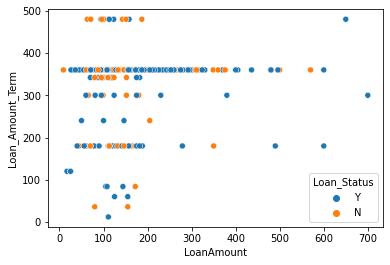

In [448]:
sb.scatterplot(A.LoanAmount,A.Loan_Amount_Term,hue=A.Loan_Status)

In [449]:
##If the customer fall into the catagory of Low Cap and Mid Lap Tenure should not be more than 360
## As it seems like chancess of getting loan reject is higher on the max tenure for Low Cap and Mid Cap applicant.

# Model performance of testing set

In [4]:
import pandas as pd
A = pd.read_csv("C:/Users/Pranav Afre/Downloads/PYTHON/training_set.csv")
B = pd.read_csv("C:/Users/Pranav Afre/Downloads/PYTHON/testing_set.csv")
B =B.drop(labels=["Loan_ID"],axis=1)
A =A.drop(labels=["Loan_ID"],axis=1)

In [5]:
def replacer(df):
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)

    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [6]:
replacer(A)
replacer(B)

In [7]:
Y = A[["Loan_Status"]]
XX_train = A[["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]]
XX_test = B[["Gender","Married","Dependents","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]]


In [8]:
cat = []
con = []
for i in XX_train.columns:
    if(XX_train[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
        
cat = []
con = []
for i in XX_test.columns:
    if(XX_test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
    

In [9]:
XX_train = XX_train[con].join(pd.get_dummies(XX_train[cat]))
XX_test = XX_test[con].join(pd.get_dummies(XX_test[cat]))

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(XX_train,Y)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_ts = model.predict(XX_test)
B["Loan Status"]=pred_ts
B

C:\Users\Pranav Afre\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban,Y
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y
